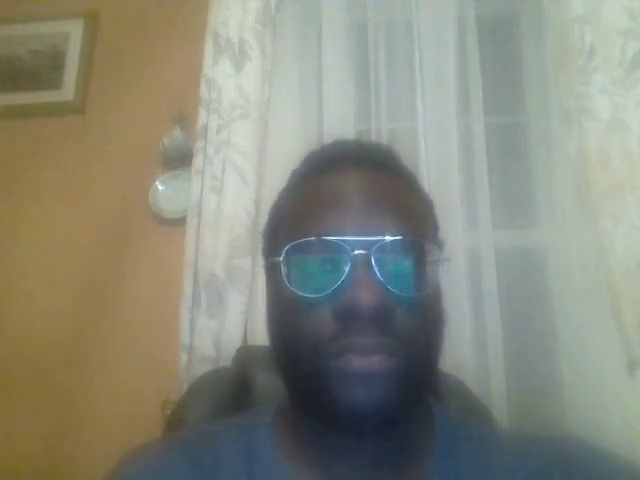

In [1]:
# load libraries
from huggingface_hub import hf_hub_download
from ultralytics import YOLO
from supervision import Detections
from PIL import Image
import numpy as np

# download model
model_path = hf_hub_download(
    repo_id="arnabdhar/YOLOv8-Face-Detection", filename="model.pt"
)

# load model
model = YOLO(model_path)

# inference
image_path = "img.png"
image = Image.open(image_path)

image

In [2]:
output = model(image, verbose=False)
results = Detections.from_ultralytics(output[0])

In [16]:
results.xyxy.shape

(1, 4)

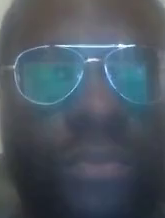

In [26]:
# min_x, min_y, max_x, max_y = results.xyxy.tolist()

# Crop the face from the image using the coordinates from results.xyxy
min_x, min_y, max_x, max_y = map(int, results.xyxy[0])
cropped_face = image.crop((min_x, min_y, max_x, max_y))
cropped_face

In [34]:
import numpy as np

# convert PIL to numpy
image_array = np.array(cropped_face)
image_array.shape

(218, 165, 3)

No face


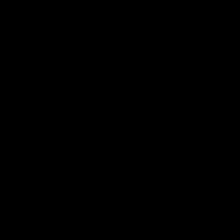

In [13]:
image_path = "00128.png"
image = Image.open(image_path)
image

In [14]:
output = model(image)
results = Detections.from_ultralytics(output[0])


0: 640x640 (no detections), 4.8ms
Speed: 25.3ms preprocess, 4.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


In [17]:
results.xyxy.shape

(0, 4)

## Video


In [2]:
import cv2

video = cv2.VideoCapture("5c25e498867f660001ae0ea6_q3_personality.mp4")
fps = video.get(cv2.CAP_PROP_FPS)
num_frames = video.get(cv2.CAP_PROP_FRAME_COUNT)
duration = num_frames / fps

frames = []
while True:
    ret, frame = video.read()
    if not ret:
        break

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame)

video.release()

In [3]:
frames = [frame for frame in frames[:: int(fps)]]
len(frames)

115

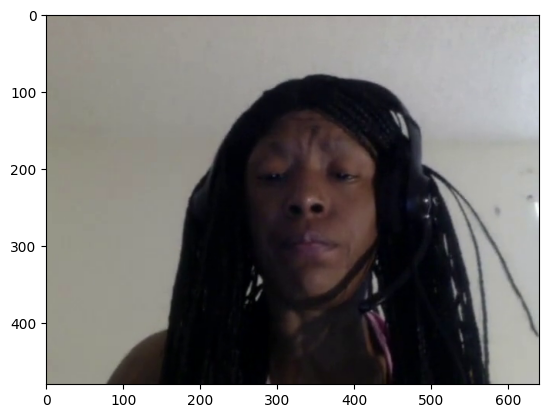

In [4]:
import matplotlib.pyplot as plt

plt.imshow(frames[-1])

Code to save frames to new video (to evaluate the loss of frames)


In [5]:
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
video_path = "temp.mp4"
video_writer = cv2.VideoWriter(video_path, fourcc, fps, (640, 480))

for frame in frames:
    video_writer.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

video_writer.release()

Apply yolo face to video


In [6]:
outputs = model(frames)


0: 480x640 1 FACE, 2.8ms
1: 480x640 1 FACE, 2.8ms
2: 480x640 1 FACE, 2.8ms
3: 480x640 1 FACE, 2.8ms
4: 480x640 1 FACE, 2.8ms
5: 480x640 1 FACE, 2.8ms
6: 480x640 1 FACE, 2.8ms
7: 480x640 1 FACE, 2.8ms
8: 480x640 1 FACE, 2.8ms
9: 480x640 1 FACE, 2.8ms
10: 480x640 1 FACE, 2.8ms
11: 480x640 1 FACE, 2.8ms
12: 480x640 1 FACE, 2.8ms
13: 480x640 1 FACE, 2.8ms
14: 480x640 1 FACE, 2.8ms
15: 480x640 1 FACE, 2.8ms
16: 480x640 1 FACE, 2.8ms
17: 480x640 1 FACE, 2.8ms
18: 480x640 1 FACE, 2.8ms
19: 480x640 1 FACE, 2.8ms
20: 480x640 1 FACE, 2.8ms
21: 480x640 1 FACE, 2.8ms
22: 480x640 1 FACE, 2.8ms
23: 480x640 1 FACE, 2.8ms
24: 480x640 1 FACE, 2.8ms
25: 480x640 1 FACE, 2.8ms
26: 480x640 1 FACE, 2.8ms
27: 480x640 1 FACE, 2.8ms
28: 480x640 1 FACE, 2.8ms
29: 480x640 1 FACE, 2.8ms
30: 480x640 1 FACE, 2.8ms
31: 480x640 1 FACE, 2.8ms
32: 480x640 1 FACE, 2.8ms
33: 480x640 1 FACE, 2.8ms
34: 480x640 1 FACE, 2.8ms
35: 480x640 1 FACE, 2.8ms
36: 480x640 1 FACE, 2.8ms
37: 480x640 1 FACE, 2.8ms
38: 480x640 1 FACE, 2

uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8


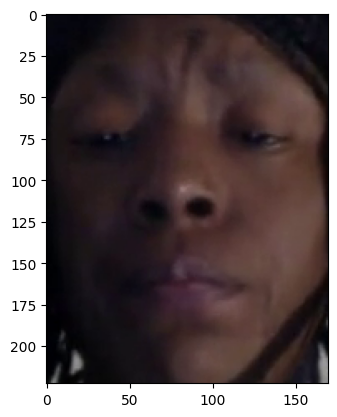

In [ ]:
import os
import numpy as np


def get_name(id: int) -> str:
    name = ""
    if id >= 0 and id < 10:
        name = "0000" + str(id)
    elif id >= 10 and id < 100:
        name = "000" + str(id)
    elif id >= 100 and id < 1000:
        name = "00" + str(id)
    elif id >= 1000 and id < 10000:
        name = "0" + str(id)
    else:
        name = str(id)
    return name


os.makedirs("temp", exist_ok=True)

for index, (frame, output) in enumerate(zip(frames, outputs)):
    result = Detections.from_ultralytics(output)

    if result.xyxy.shape[0] > 0:
        min_x, min_y, max_x, max_y = map(int, result.xyxy[0])
        cropped_frame = frame[min_y:max_y, min_x:max_x, :]
    else:
        cropped_frame = np.zeros((224, 224, 3), dtype=np.uint8)

    plt.imshow(cropped_frame)

    # save as BGR as opencv expects BGR by default and here we put RGB
    cv2.imwrite(
        filename=f"temp/{get_name(index)}.png",
        img=cv2.cvtColor(cropped_frame, cv2.COLOR_RGB2BGR),
    )

## No face video (1 per whole dataset where no face can be even observed)


In [8]:
import cv2

video = cv2.VideoCapture("5e5731e3e1e8b90e25c1f3a2_q1_generic.mp4")
fps = video.get(cv2.CAP_PROP_FPS)
num_frames = video.get(cv2.CAP_PROP_FRAME_COUNT)
duration = num_frames / fps

frames = []
while True:
    ret, frame = video.read()
    if not ret:
        break

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame)

video.release()

In [9]:
frames = [frame for frame in frames[:: int(fps)]]
len(frames)

197

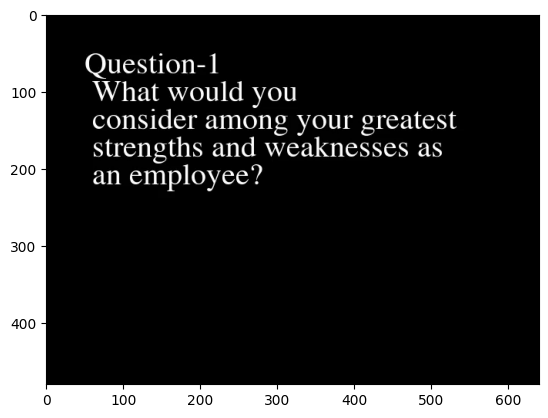

In [10]:
import matplotlib.pyplot as plt

plt.imshow(frames[-1])

In [11]:
outputs = model(frames)


0: 480x640 (no detections), 2.9ms
1: 480x640 (no detections), 2.9ms
2: 480x640 (no detections), 2.9ms
3: 480x640 (no detections), 2.9ms
4: 480x640 (no detections), 2.9ms
5: 480x640 (no detections), 2.9ms
6: 480x640 (no detections), 2.9ms
7: 480x640 (no detections), 2.9ms
8: 480x640 (no detections), 2.9ms
9: 480x640 (no detections), 2.9ms
10: 480x640 (no detections), 2.9ms
11: 480x640 (no detections), 2.9ms
12: 480x640 (no detections), 2.9ms
13: 480x640 (no detections), 2.9ms
14: 480x640 (no detections), 2.9ms
15: 480x640 (no detections), 2.9ms
16: 480x640 (no detections), 2.9ms
17: 480x640 (no detections), 2.9ms
18: 480x640 (no detections), 2.9ms
19: 480x640 (no detections), 2.9ms
20: 480x640 (no detections), 2.9ms
21: 480x640 (no detections), 2.9ms
22: 480x640 (no detections), 2.9ms
23: 480x640 (no detections), 2.9ms
24: 480x640 (no detections), 2.9ms
25: 480x640 (no detections), 2.9ms
26: 480x640 (no detections), 2.9ms
27: 480x640 (no detections), 2.9ms
28: 480x640 (no detections), 

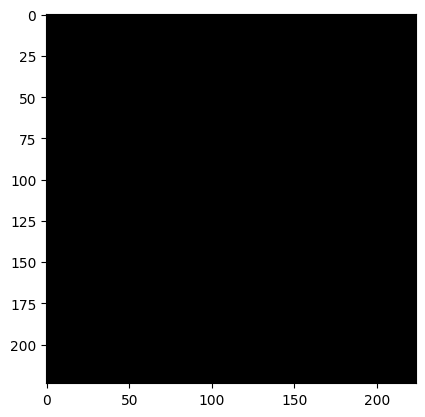

In [13]:
import os
import numpy as np


def get_name(id: int) -> str:
    name = ""
    if id >= 0 and id < 10:
        name = "0000" + str(id)
    elif id >= 10 and id < 100:
        name = "000" + str(id)
    elif id >= 100 and id < 1000:
        name = "00" + str(id)
    elif id >= 1000 and id < 10000:
        name = "0" + str(id)
    else:
        name = str(id)
    return name


os.makedirs("temp2", exist_ok=True)

for index, (frame, output) in enumerate(zip(frames, outputs)):
    result = Detections.from_ultralytics(output)

    if result.xyxy.shape[0] > 0:
        min_x, min_y, max_x, max_y = map(int, result.xyxy[0])
        cropped_frame = frame[min_y:max_y, min_x:max_x, :]
    else:
        cropped_frame = np.zeros((224, 224, 3), dtype=np.uint8)

    plt.imshow(cropped_frame)

    # save as BGR as opencv expects BGR by default and here we put RGB
    cv2.imwrite(
        filename=f"temp2/{get_name(index)}.png",
        img=cv2.cvtColor(cropped_frame, cv2.COLOR_RGB2BGR),
    )